In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Mexico  = pd.read_csv('Mexico.csv')

In [3]:
# Verificamos información del dataframe
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26582 non-null  int64  
 1   last_scraped                                  26582 non-null  object 
 2   name                                          26582 non-null  object 
 3   host_id                                       26582 non-null  int64  
 4   host_name                                     26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_response_time                            26582 non-null  object 
 7   host_is_superhost                             26582 non-null  object 
 8   host_identity_verified                        26582 non-null  object 
 9   neighbourhood                                 26582 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Mexico['maximum_nights_avg_ntm'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: maximum_nights_avg_ntm
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Mexico['maximum_nights_avg_ntm'].max()
Min = Mexico['maximum_nights_avg_ntm'].min()
Limites = [Min, Max]
Limites

[1.0, 1825.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

1824.0

In [8]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 26582

ni = 1 + 3.32 * np.log10(n)
ni

15.689631010177528

In [9]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

116.25512408907578

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [10]:
# Categorización de variables
intervalos = np.linspace (1, 1825, 16)
intervalos

array([1.0000e+00, 1.2260e+02, 2.4420e+02, 3.6580e+02, 4.8740e+02,
       6.0900e+02, 7.3060e+02, 8.5220e+02, 9.7380e+02, 1.0954e+03,
       1.2170e+03, 1.3386e+03, 1.4602e+03, 1.5818e+03, 1.7034e+03,
       1.8250e+03])

In [11]:
# Creamos las categorías
categorias = [ "Categoria1", "Categoria2", "Categoria3", "Categoria4", "Categoria5", "Categoria6", "Categoria7", "Categoria8", "Categoria9", "Categoria10", "Categoria11", "Categoria12", "Categoria13", "Categoria14", "Categoria15" ]

In [12]:
# Creamos las ctegorias en la columna numerica
Mexico['maximum_nights_avg_ntm'] = pd.cut ( x = Mexico ['maximum_nights_avg_ntm'], bins = intervalos, labels = categorias )
Mexico['maximum_nights_avg_ntm']

0         Categoria1
1         Categoria3
2         Categoria1
3         Categoria2
4        Categoria10
            ...     
26577     Categoria1
26578     Categoria3
26579     Categoria3
26580     Categoria3
26581     Categoria3
Name: maximum_nights_avg_ntm, Length: 26582, dtype: category
Categories (15, object): ['Categoria1' < 'Categoria2' < 'Categoria3' < 'Categoria4' ... 'Categoria12' < 'Categoria13' < 'Categoria14' < 'Categoria15']

In [13]:
table1 = freq_tbl(Mexico['maximum_nights_avg_ntm'])
table1

,maximum_nights_avg_ntm,frequency,percentage,cumulative_perc
0,Categoria10,14244,0.535851,0.536114
1,Categoria3,7607,0.286171,0.822425
2,Categoria1,3462,0.130239,0.952727
3,Categoria2,423,0.015913,0.968648
4,Categoria6,315,0.011850,0.980504
5,Categoria9,243,0.009142,0.989650
6,Categoria4,86,0.003235,0.992886
7,Categoria7,82,0.003085,0.995973
8,Categoria8,57,0.002144,0.998118
9,Categoria5,49,0.001843,0.999962


In [14]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,maximum_nights_avg_ntm,frequency
0,Categoria10,14244
1,Categoria3,7607
2,Categoria1,3462
3,Categoria2,423
4,Categoria6,315
5,Categoria9,243
6,Categoria4,86
7,Categoria7,82
8,Categoria8,57
9,Categoria5,49


In [16]:
# Obtener un filtro de los valores más relevantes de las vaiables categóricas seleccionadas

Filtro = table2[ table2['frequency'] > 1]
Filtro

,maximum_nights_avg_ntm,frequency
0,Categoria10,14244
1,Categoria3,7607
2,Categoria1,3462
3,Categoria2,423
4,Categoria6,315
5,Categoria9,243
6,Categoria4,86
7,Categoria7,82
8,Categoria8,57
9,Categoria5,49


In [17]:
# Ajusto el indice de mi data frame

Filtro_index = Filtro.set_index('maximum_nights_avg_ntm')
Filtro_index

,frequency
maximum_nights_avg_ntm,
Categoria10,14244
Categoria3,7607
Categoria1,3462
Categoria2,423
Categoria6,315
Categoria9,243
Categoria4,86
Categoria7,82
Categoria8,57


Text(0, 0.5, 'Frecuencia')

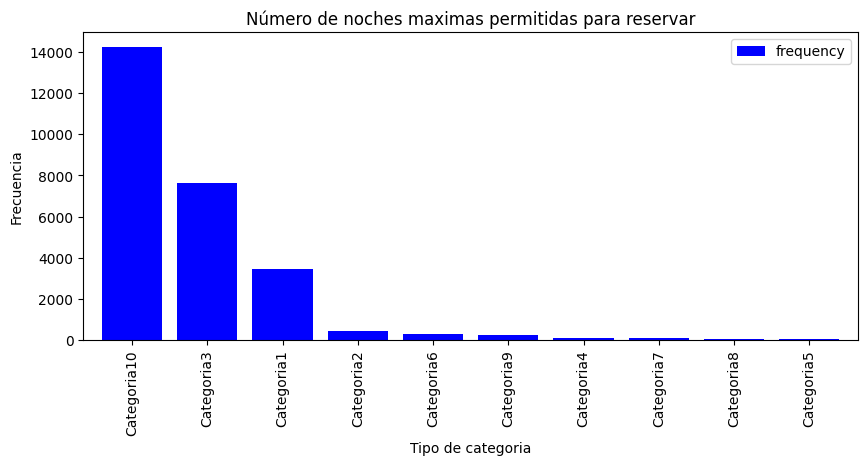

In [18]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Número de noches maximas permitidas para reservar')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')